Group 16

Akshobya Salekoppalu Hari Charan

Sangeetha Arun Raj

Sathyanarayana Balla


## **Title**: Analyzing Social Media Habits and Their Impact on Mental Well-being

# **Objective of the Proposed Research**
The objective of this research is to understand how social media affects the younger generation and impacts their mental health. In today's digital era, social media has not become a part of entertainment but has become a routine itself, it also significantly influences on how we connect and communicate with the world around us. On the contrary it has become a boon on the young minds which is leading to anxiety, stress, loneliness. Hence, understanding these crucial patterns especially among university students who are highly engaged in social media platforms helps in the analysis on how social media is distracting students, sleeping issues and over-all well being.

Our stakeholder include university administration, including student counsellors, mental health advisors, and academic advisors. These professionals help in developing students well-being. With our analysis and data-driven insights on students well- being, they can support students accordingly. For instance, identifying students who are addicted to social media at the earliest can be given sufficient intervention and support. Also, understanding the relation between students addiction to digital platforms and academic progress can help universities promote balancing their academic responsibilities.

Our research also holds good for digital companies. Companies can make use of our analysis to enhance their platforms by keeping in mind the younger generation to notify them on the time they are spending on the platforms. By our analysis, we aim to enhance younger generation and the university and other professionals and social media platforms to make informed decisions that enhance well- being of users.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster



In [ ]:
data = pd.read_csv('smmh.csv')

# **Data Exploration**

Data Head

In [ ]:
data.head(10)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
5,4/18/2022 19:33:48,22.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,4,...,2,3,4,3,4,4,3,3,2,4
6,4/18/2022 19:36:12,21.0,Female,Married,University Student,University,Yes,"Facebook, Instagram, YouTube, Snapchat, TikTok",Between 3 and 4 hours,4,...,2,2,4,3,5,3,4,5,5,3
7,4/18/2022 19:36:17,21.0,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,...,3,3,3,1,1,3,1,5,5,1
8,4/18/2022 19:39:36,21.0,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,...,3,3,1,1,1,3,1,5,5,1
9,4/18/2022 19:41:34,20.0,Male,Single,University Student,University,No,"Reddit, Pinterest",Less than an Hour,1,...,1,1,1,1,1,1,1,1,1,1


481 records and 21 columns of the dataset, which represents various demographic and social media usage factors, are included.


Data info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup


Age, gender, marital status, employment position, social media usage habits, and psychological aspects of social media use are all included in the columns.

Data Description

In [ ]:
data.describe()


,1. What is your age?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
count,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.13659,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663
std,9.91511,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619
min,13.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.00000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.00000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.00000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


The data shows a broad set of participants with moderate social media usage patterns, most of whom are in their mid-twenties. They occasionally become distracted, feel a little restless without social media, and engage in modest comparison behaviors. Participants also express sporadic symptoms of depression, infrequently seek for validation, and occasionally experience emotional difficulties. These results provide important new understandings of the intricate relationship between social media use and individuals' psychological wellbeing.

Data Missing Values

In [ ]:
data.isnull().sum()



Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

There are 30 missing values in the column '5. What type of organizations are you affiliated with?'

Gender Distribution

In [ ]:
data['2. Gender'].value_counts()

Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: 2. Gender, dtype: int64

There are 211 males and 263 females in the dataset, respectively. A few entries have non-binary and gender-neutral categories.

Unique Gender-Relationship Status Combinations

In [ ]:
unique_combinations = data[['2. Gender', '3. Relationship Status']].drop_duplicates()


unique_combinations

,2. Gender,3. Relationship Status
0,Male,In a relationship
1,Female,Single
6,Female,Married
7,Female,In a relationship
9,Male,Single
19,Male,Divorced
27,Male,Married
35,Nonbinary,Single
67,Non-binary,Single
85,NB,Single


The dataset includes different non-binary categories as well as uncommon combinations of gender and marital status, such as men in partnerships, single men, and married women.

Correlation Matrix

<ipython-input-9-a2751f34c6bc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


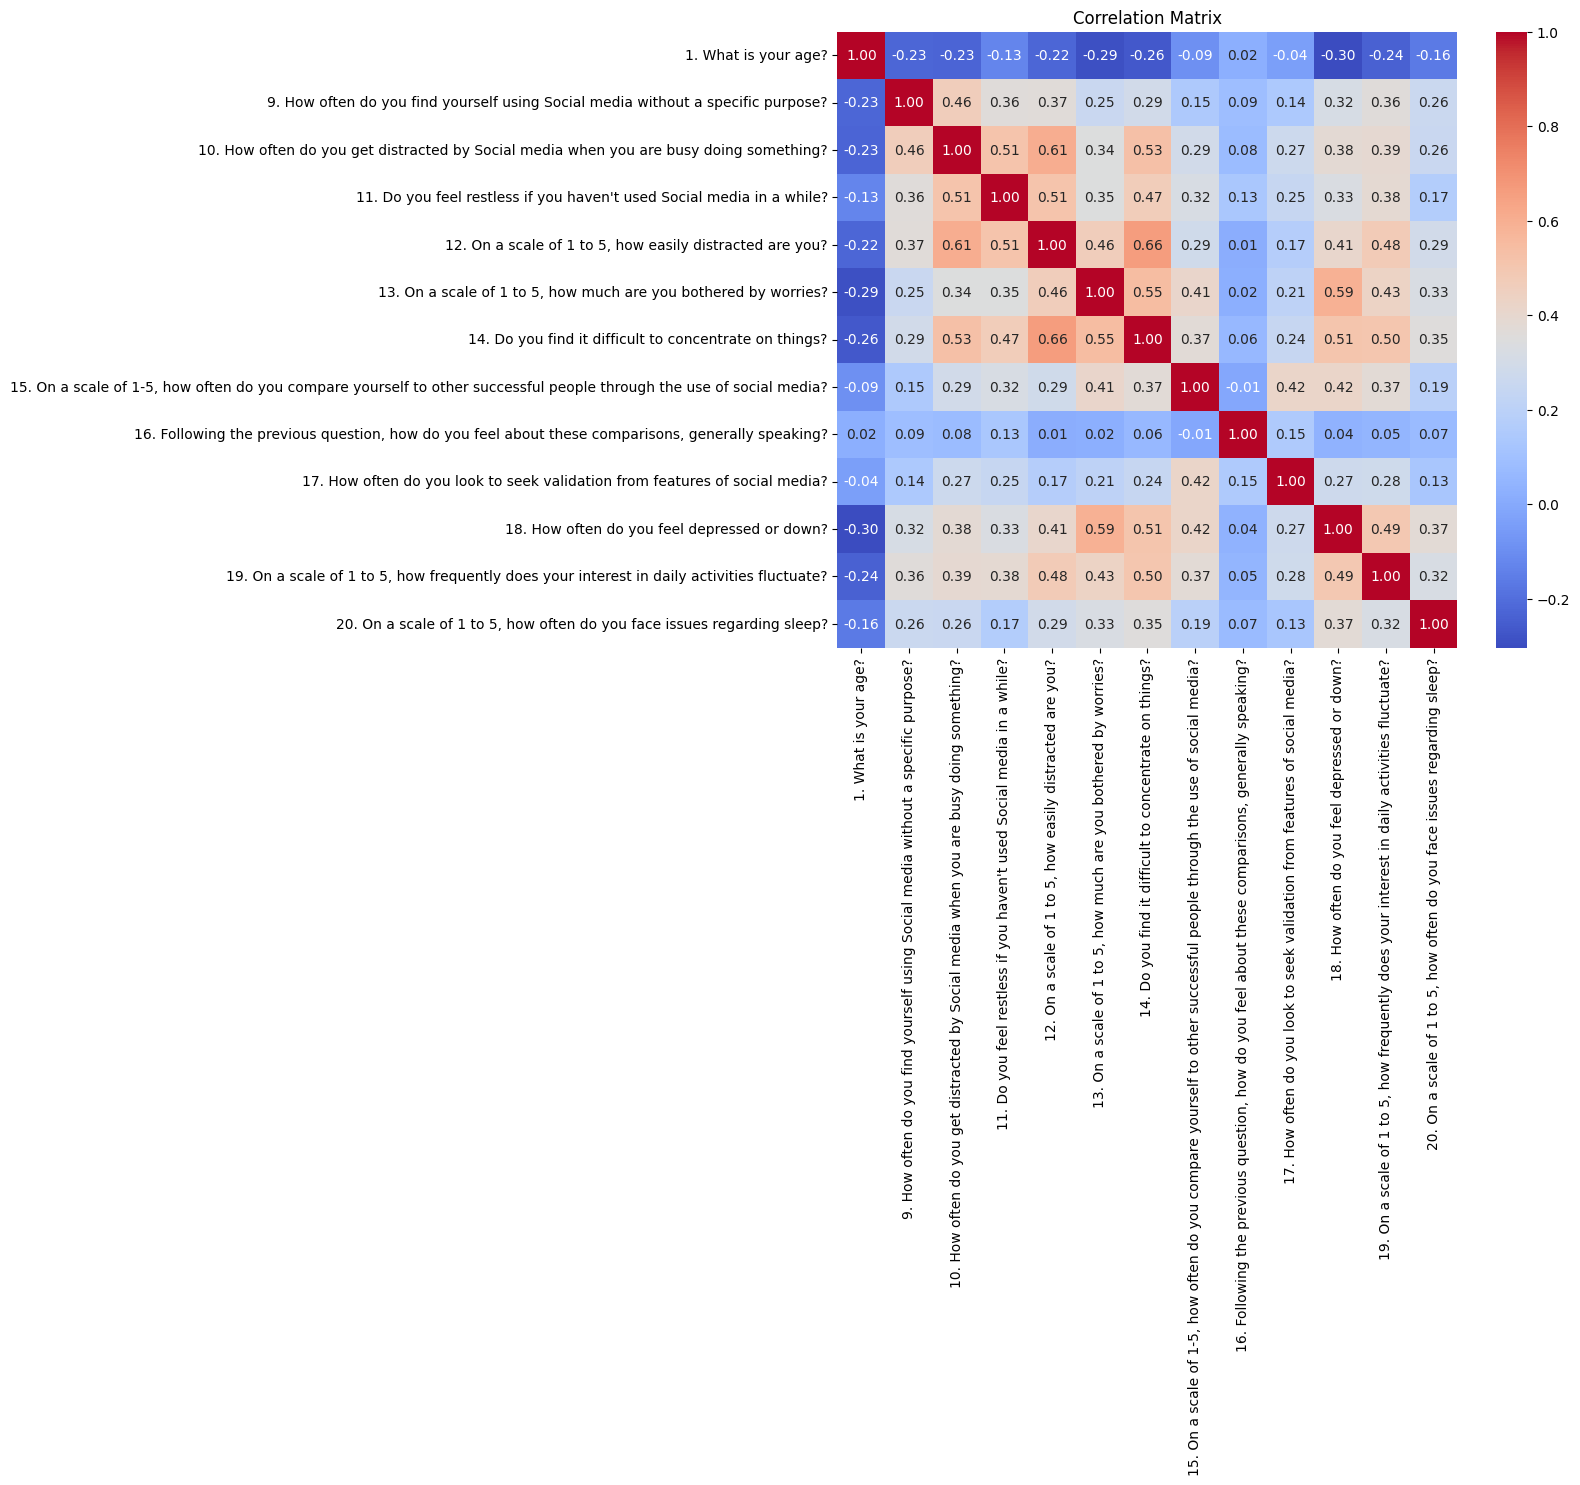

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The associations between various variables in the cleaned dataset are visually shown by the correlation matrix and heatmap. A positive correlation is indicated by positive values (closer to 1), which means that as one variable rises, the other variable tends to rise as well. A negative correlation is represented by negative numbers (closer to -1), which means that when one variable rises, the other tends to fall.

Lighter colors (near to 0) in this heatmap imply less or no correlation, whereas darker colors (close to 1 or -1) indicate stronger relationships. Finding patterns and connections between the characteristics surveyed through analysis can help shed light on the data, allowing for additional research and interpretation.






# **Data Cleaning**

In [ ]:

cleaned_data = data.drop(columns=['Timestamp'])

data_cleaned = cleaned_data.dropna()


data_cleaned = data_cleaned.drop_duplicates()


data_cleaned.reset_index(drop=True, inplace=True)
data_cleaned

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4
447,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1
448,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2
449,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4


The data has successfully undergone preprocessing and cleaning. The timestamp column was eliminated because the analysis does not require it. Duplicate rows and missing value rows have both been eliminated from the table. With 451 rows and 20 columns in the cleaned dataset, it is now ready for in-depth analysis and insight extraction.

# **Adaptation**

In [ ]:
questions = ['9. How often do you find yourself using Social media without a specific purpose?',
                   '10. How often do you get distracted by Social media when you are busy doing something?',
                   '11. Do you feel restless if you haven\'t used Social media in a while?',
                   '12. On a scale of 1 to 5, how easily distracted are you?',
                   '17. How often do you look to seek validation from features of social media?']


data_cleaned['Social_Media_Usage_Score'] = data_cleaned[questions].mean(axis=1)


sleep_questions = ['20. On a scale of 1 to 5, how often do you face issues regarding sleep?']


data_cleaned['Sleep_Troubles_Score'] = data_cleaned[sleep_questions]


wellbeing_questions = ['13. On a scale of 1 to 5, how much are you bothered by worries?',
                       '18. How often do you feel depressed or down?']


data_cleaned['Overall_Wellbeing_Score'] = data_cleaned[wellbeing_questions].mean(axis=1)


data_cleaned

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,...,14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?",Social_Media_Usage_Score,Sleep_Troubles_Score,Overall_Wellbeing_Score
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,...,5,2,3,2,5,4,5,3.4,5,3.5
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,...,4,5,1,1,5,4,5,2.8,5,5.0
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,...,4,3,3,1,4,2,5,1.8,5,4.5
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,...,3,5,1,2,4,3,2,2.4,2,4.5
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,...,5,3,3,3,4,4,1,3.8,1,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,...,4,4,2,4,3,4,4,3.6,4,3.0
447,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,...,4,4,2,4,4,4,1,2.4,1,4.0
448,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,...,3,3,3,4,2,2,2,3.4,2,2.0
449,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,...,2,2,3,4,4,5,4,2.8,4,3.5


To construct composite scores that reflect many facets of participants' actions and wellbeing, the data was further processed. Three significant scores have been computed:

The Social Media Usage Score, which is based on participants' answers to questions about their usage patterns on social media, shows how often people use it for no particular reason, how readily they get distracted, and how often they become sidetracked. This rating, which ranges from 1 to 5, reflects how frequently users use social media generally.

Score for Sleep Troubles: Determined by participants' answers to a question about their sleep troubles, showing how frequently they have sleep-related concerns. This number, which goes from 1 to 5, indicates how seriously participants struggle with sleep.

Generally feeling good Score: Calculated based on participants' answers to questions about concerns and depressive or sad sentiments, providing an overall indicator of participants' emotional health. This number, which varies from 1 to 5, reflects the general mental health of the participants.

These composite ratings give a comprehensive picture of individuals' social media usage, sleep patterns, and emotional health, offering insightful data for further investigation and interpretation.

# **Visualization**

### Histogram - Distribution of Age

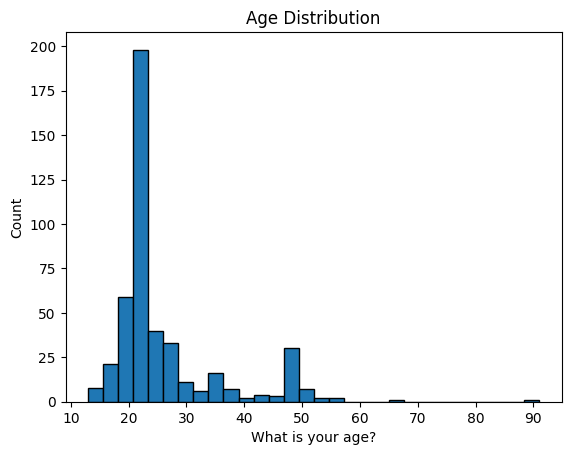

In [ ]:
plt.hist(data_cleaned['1. What is your age?'], bins=30, edgecolor='black')
plt.xlabel('What is your age?')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


The distribution of participants' ages is clearly visualized by the histogram, which displays the frequency of various age groups. This aids in comprehending the poll respondents' age distribution.

### Pie Chart - Relationship Status

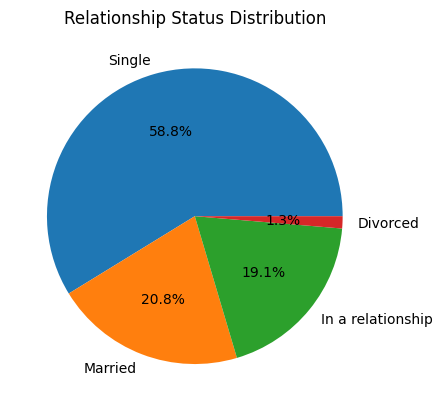

In [ ]:
relationship_counts = data_cleaned['3. Relationship Status'].value_counts()
plt.pie(relationship_counts, labels=relationship_counts.index, autopct='%1.1f%%')
plt.title('Relationship Status Distribution')
plt.show()


The percentage of participants in each relationship status is represented graphically by the pie chart. Since each piece of the pie represents a particular relationship state, it is simple to understand the distribution at a glance.

### Count Plot - Gender distribution

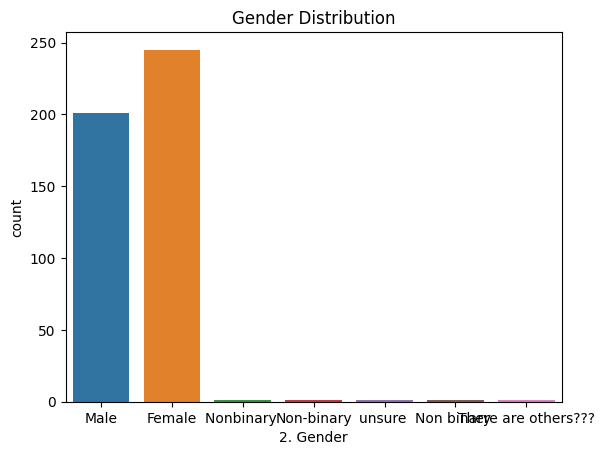

In [ ]:
sns.countplot(x='2. Gender', data=data_cleaned)
plt.title('Gender Distribution')
plt.show()

The number of participants for each gender category is shown on the count plot. It provides a brief summary of how the surveyed population's gender distribution is distributed.

### Box Plot - Relationship Status vs Social_Media_Usage_Score

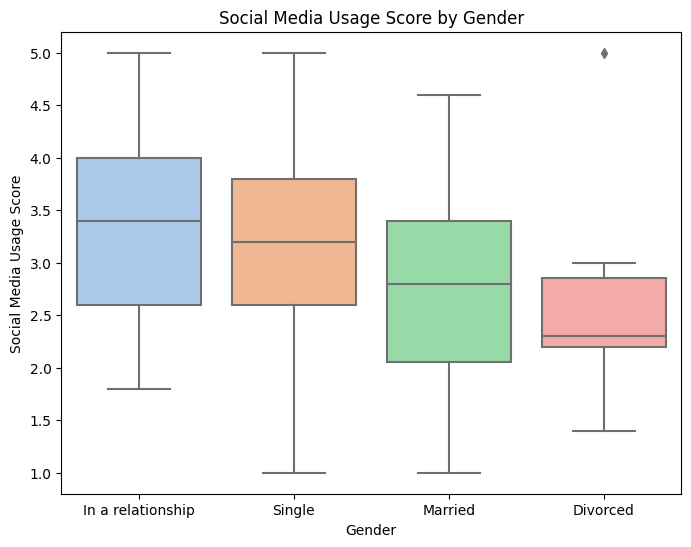

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='3. Relationship Status', y='Social_Media_Usage_Score', data=data_cleaned, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Social Media Usage Score')
plt.title('Social Media Usage Score by Gender')
plt.show()

The distribution of Social Media Usage Scores across various relationship statuses is seen in this box plot. It offers perceptions on how participants' social media usage varies depending on their marital status. Within each category, the box plot displays the median, quartiles, and possible outliers.

### 3D Scatter Plot - Social Media Usage vs. Sleep Troubles vs Overall wellbeing score

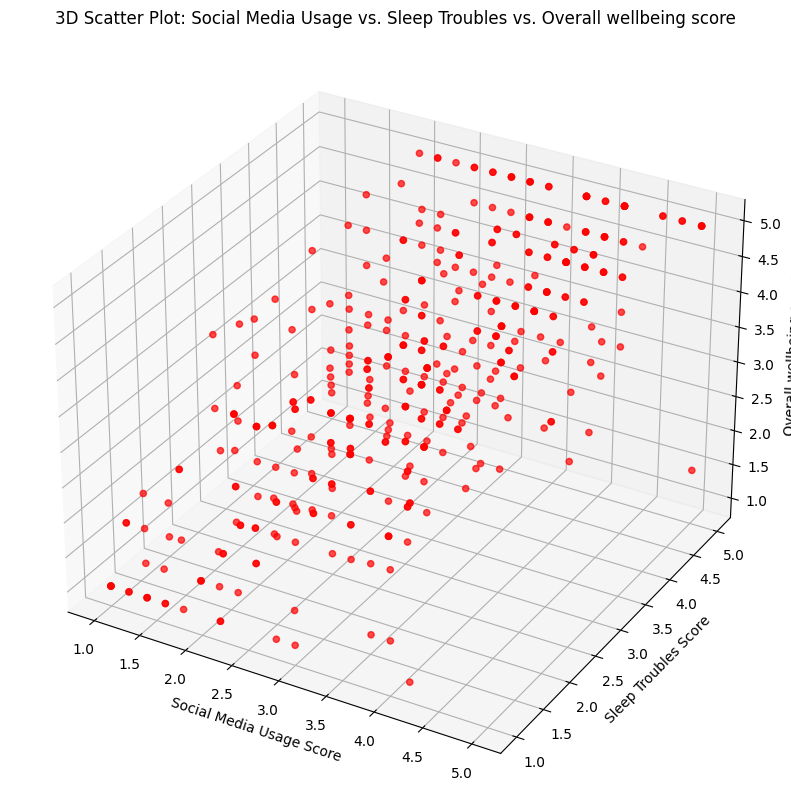

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

x = data_cleaned['Social_Media_Usage_Score']
y = data_cleaned['Sleep_Troubles_Score']
z = data_cleaned['Overall_Wellbeing_Score']

ax.scatter(x, y, z, color='red', edgecolor='red', alpha=0.7)

ax.set_xlabel('Social Media Usage Score')
ax.set_ylabel('Sleep Troubles Score')
ax.set_zlabel('Overall wellbeing score')

ax.set_title('3D Scatter Plot: Social Media Usage vs. Sleep Troubles vs. Overall wellbeing score')

plt.show()

The link between the Social Media Usage Score, the Sleep Problems Score, and the Overall Well-Being Score is represented by a 3D scatter plot. Each point on the plot represents a distinct participant, and its location in three-dimensional space signifies how well they did on each of these three factors. An examination of any correlations or patterns between these parameters is made possible by this intricate depiction.

The linkages and distributions within the dataset are insightfully revealed by these visualizations, allowing for a more thorough knowledge of the traits and actions of the participants.

# Cluster Analysis

### Hierarchical Clustering
In the below code, to perform hierarchical clustering three features were considered social media usage score, sleep troubles score and overall wellbeing score to understand the trends and patterns of the data. A bar plot was plotted to understand the clustering, x-axis denotes the clustering and y-axis denotes number of observations.

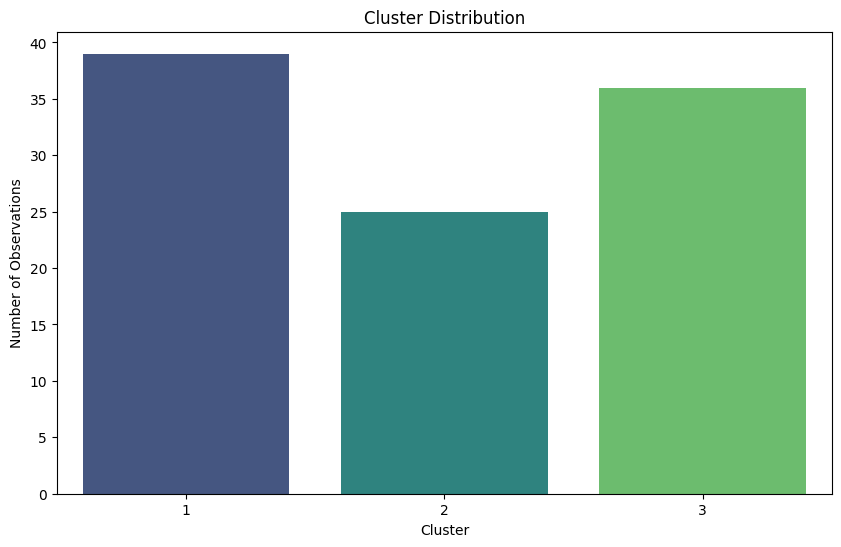

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
import numpy as np


np.random.seed(0)
data_clean = pd.DataFrame({
    'Social_Media_Usage_Score': np.random.rand(100),
    'Sleep_Troubles_Score': np.random.rand(100),
    'Overall_Wellbeing_Score': np.random.rand(100)
})


features = ['Social_Media_Usage_Score', 'Sleep_Troubles_Score', 'Overall_Wellbeing_Score']
data_for_clustering = data_clean[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)
distances = pdist(scaled_data, metric='euclidean')
linkage_matrix = linkage(distances, method='ward')
num_clusters = 3
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
data_clean['Cluster'] = clusters


cluster_counts = data_clean['Cluster'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.show()




In [ ]:
data_clean.head()

,Social_Media_Usage_Score,Sleep_Troubles_Score,Overall_Wellbeing_Score,Cluster
0,0.548814,0.677817,0.311796,3
1,0.715189,0.270008,0.696343,2
2,0.602763,0.735194,0.377752,3
3,0.544883,0.962189,0.179604,3
4,0.423655,0.248753,0.024679,2


### Dendrogram-
A sample size of 50 was considered randomly to perform clustering to visualise hierachical outputs of numerical data. The color represents grouping of different clusters which signifies important clusters and less important clusters.

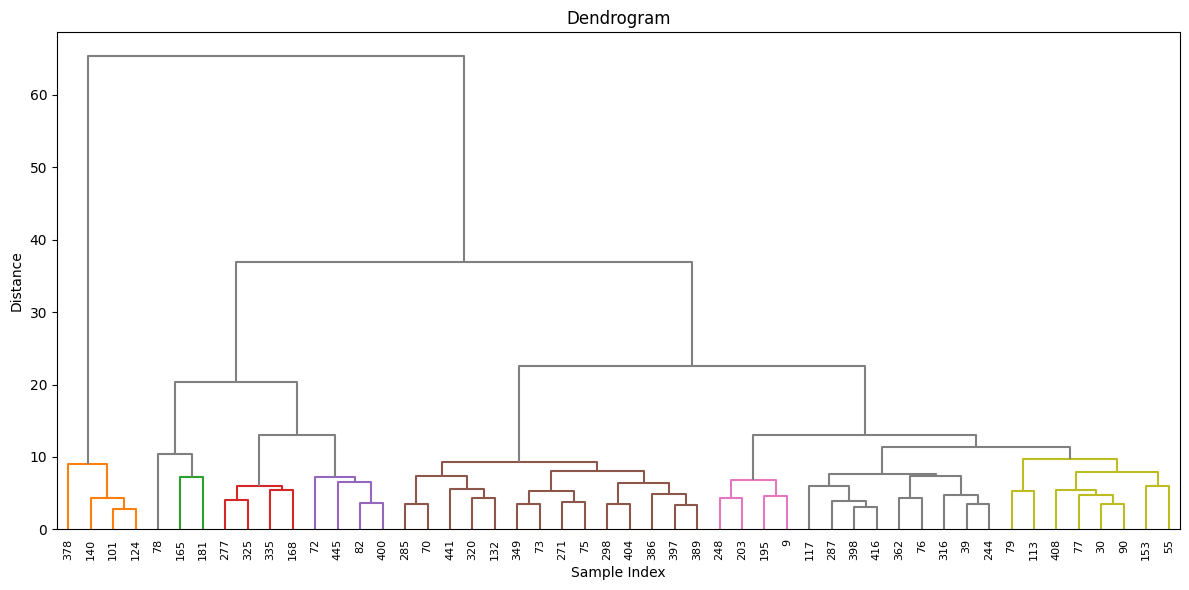

In [ ]:

sample_size = 50
numeric_data = data_cleaned.select_dtypes(include=[np.number])
sampled_data = numeric_data.sample(n=sample_size, random_state=42)


linkage_matrix = linkage(sampled_data, method='ward')


plt.figure(figsize=(12, 6))
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    linkage_matrix,
    leaf_rotation=90.,
    leaf_font_size=8.,
    labels=sampled_data.index,
    color_threshold=10,
    above_threshold_color='gray'
)
plt.tight_layout()
plt.show()


# Unsupervised Clustering

Step-by-step K-means
The below code represents step by step k-means clustering on numerical data with speicific number of k. The output assigns labels for cluster algorithm for every observation based on centroids.

In [ ]:
def kmeans(numeric_data, k, max_iterations=100):

    centroids = numeric_data.sample(n=k, random_state=42)

    for _ in range(max_iterations):

        distances = np.linalg.norm(numeric_data.values[:, np.newaxis] - centroids.values, axis=2)
        labels = np.argmin(distances, axis=1)


        new_centroids = np.array([numeric_data[labels == i].mean(axis=0) for i in range(k)])


        if np.array_equal(new_centroids, centroids.values):
            break

        centroids = pd.DataFrame(new_centroids, columns=numeric_data.columns)


    return labels


cluster_labels = kmeans(numeric_data.select_dtypes(include=[np.number]), k=3)


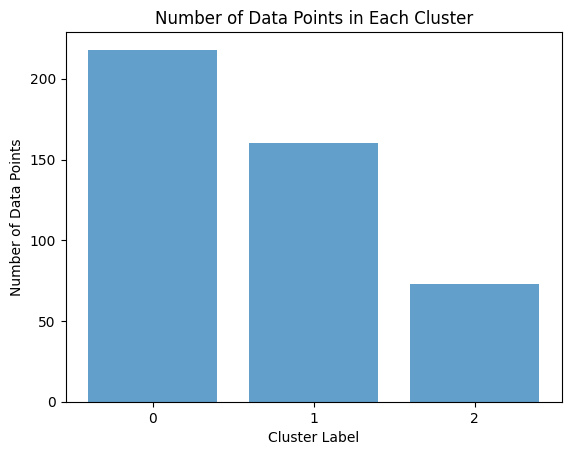

In [ ]:
import matplotlib.pyplot as plt


cluster_counts = pd.Series(cluster_labels).value_counts()


plt.bar(cluster_counts.index, cluster_counts.values, align='center', alpha=0.7)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points in Each Cluster')
plt.xticks(cluster_counts.index)
plt.show()

In [ ]:
cluster_labels

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0,
       1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1,
       2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1,
       1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [ ]:
numeric_data.head()

,1. What is your age?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?",Social_Media_Usage_Score,Sleep_Troubles_Score,Overall_Wellbeing_Score
0,21.0,5,3,2,5,2,5,2,3,2,5,4,5,3.4,5,3.5
1,21.0,4,3,2,4,5,4,5,1,1,5,4,5,2.8,5,5.0
2,21.0,3,2,1,2,5,4,3,3,1,4,2,5,1.8,5,4.5
3,21.0,4,2,1,3,5,3,5,1,2,4,3,2,2.4,2,4.5
4,21.0,3,5,4,4,5,5,3,3,3,4,4,1,3.8,1,4.5


### sklearn.cluster
The k-means clustering algorithm was implemented to perform three different groups based on their similarity. Every data point was labelled with a cluster identifier, these label was adapted as a new column to the original dataset.

In [ ]:
from sklearn.cluster import KMeans

k=3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(numeric_data)


cluster_labels = kmeans.labels_

numeric_data['Cluster_Labels'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


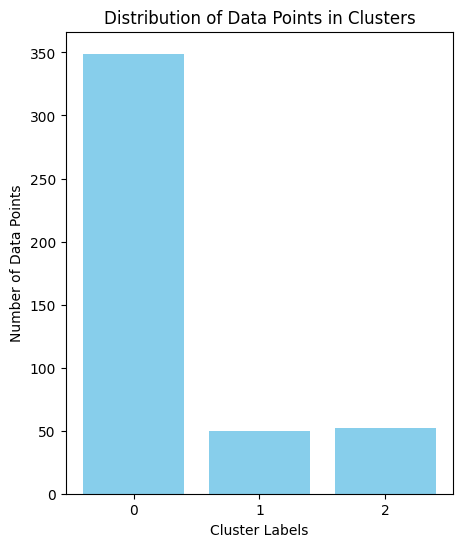

In [ ]:
cluster_counts = numeric_data['Cluster_Labels'].value_counts()

plt.figure(figsize=(5, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster Labels')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points in Clusters')
plt.xticks(cluster_counts.index)
plt.show()


In [ ]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
numeric_data.head()

,1. What is your age?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?",Social_Media_Usage_Score,Sleep_Troubles_Score,Overall_Wellbeing_Score,Cluster_Labels
0,21.0,5,3,2,5,2,5,2,3,2,5,4,5,3.4,5,3.5,0
1,21.0,4,3,2,4,5,4,5,1,1,5,4,5,2.8,5,5.0,0
2,21.0,3,2,1,2,5,4,3,3,1,4,2,5,1.8,5,4.5,0
3,21.0,4,2,1,3,5,3,5,1,2,4,3,2,2.4,2,4.5,0
4,21.0,3,5,4,4,5,5,3,3,3,4,4,1,3.8,1,4.5,0


# Supervised Clustering-
The predict KNN function is the K-nearest neigbors algorithm. We have trained five dofferent models with different values of k to take the nearest neighbor data point to make classification decision

In [ ]:
from scipy.spatial.distance import cdist

def predictKNN(k, data_point, numeric_data):

    distances = cdist(numeric_data.values, [data_point])


    nearest_indices = np.argsort(distances, axis=0)[:k].flatten()


    classifications = numeric_data.iloc[nearest_indices]


    predicted_class = classifications.mode().iloc[0]

    return predicted_class




### Model 1-
The first model to predict KNN function was used to get a new data point with assigning k= 5 for 5 neareat data points.

In [ ]:
data_point = np.random.rand(numeric_data.shape[1])
predicted_class = predictKNN(k=5, data_point=data_point, numeric_data=numeric_data)
print("Predicted Class:", predicted_class)

Predicted Class: 1. What is your age?                                                                                                    13.0
9. How often do you find yourself using Social media without a specific purpose?                                         3.0
10. How often do you get distracted by Social media when you are busy doing something?                                   4.0
11. Do you feel restless if you haven't used Social media in a while?                                                    1.0
12. On a scale of 1 to 5, how easily distracted are you?                                                                 3.0
13. On a scale of 1 to 5, how much are you bothered by worries?                                                          3.0
14. Do you find it difficult to concentrate on things?                                                                   1.0
15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of socia

### Model 2-
The second knn model was used to get single labelled data points which was nearest to k=10

In [ ]:
predicted_class = predictKNN(k=10, data_point=data_point, numeric_data=numeric_data)
print("Predicted Class:", predicted_class)

Predicted Class: 1. What is your age?                                                                                                    14.0
9. How often do you find yourself using Social media without a specific purpose?                                         3.0
10. How often do you get distracted by Social media when you are busy doing something?                                   4.0
11. Do you feel restless if you haven't used Social media in a while?                                                    2.0
12. On a scale of 1 to 5, how easily distracted are you?                                                                 3.0
13. On a scale of 1 to 5, how much are you bothered by worries?                                                          3.0
14. Do you find it difficult to concentrate on things?                                                                   2.0
15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of socia

### Model 3-
Model 3 was trained with k=20 to get the nearest data points and to classify the nearest data points.

In [ ]:
predicted_class = predictKNN(k=20, data_point=data_point, numeric_data=numeric_data)
print("Predicted Class:", predicted_class)

Predicted Class: 1. What is your age?                                                                                                    14.0
9. How often do you find yourself using Social media without a specific purpose?                                         3.0
10. How often do you get distracted by Social media when you are busy doing something?                                   1.0
11. Do you feel restless if you haven't used Social media in a while?                                                    2.0
12. On a scale of 1 to 5, how easily distracted are you?                                                                 3.0
13. On a scale of 1 to 5, how much are you bothered by worries?                                                          3.0
14. Do you find it difficult to concentrate on things?                                                                   2.0
15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of socia

### Model 4-
The fourth model was trained with k=30 for the nearest data points.

In [ ]:
predicted_class = predictKNN(k=30, data_point=data_point, numeric_data=numeric_data)
print("Predicted Class:", predicted_class)

Predicted Class: 1. What is your age?                                                                                                    17.0
9. How often do you find yourself using Social media without a specific purpose?                                         4.0
10. How often do you get distracted by Social media when you are busy doing something?                                   1.0
11. Do you feel restless if you haven't used Social media in a while?                                                    1.0
12. On a scale of 1 to 5, how easily distracted are you?                                                                 3.0
13. On a scale of 1 to 5, how much are you bothered by worries?                                                          3.0
14. Do you find it difficult to concentrate on things?                                                                   2.0
15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of socia

### Model 5-
The fifth model trained was k=50 to classify the nearest data points.

In [ ]:
predicted_class = predictKNN(k=50, data_point=data_point, numeric_data=numeric_data)
print("Predicted Class:", predicted_class)

Predicted Class: 1. What is your age?                                                                                                    19.0
9. How often do you find yourself using Social media without a specific purpose?                                         3.0
10. How often do you get distracted by Social media when you are busy doing something?                                   2.0
11. Do you feel restless if you haven't used Social media in a while?                                                    1.0
12. On a scale of 1 to 5, how easily distracted are you?                                                                 3.0
13. On a scale of 1 to 5, how much are you bothered by worries?                                                          3.0
14. Do you find it difficult to concentrate on things?                                                                   2.0
15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of socia

## **Project Report**

### Title: Analyzing Social Media Habits and Their Impact on Mental Well-being

To,

1) The Department of University Administration

2) Student Counsellors

3) Mental Health Advisors

4) Academic Advisors

### Subject-

Report on the analysis made on mental health analysis with respect to social media usage.

The report holds summary and findings of the project and also includes data driven recommendaions which relevants to the above mentioned stakeholders. We have also attached relevant plots to showcase our findings are strong.

### Summary:

Our thorough examination of social media usage trends has provided important new information about our user base's behavior. It has come to our attention that a wide range of demographics among our users actively utilize social media. Nevertheless, there are drawbacks to this involvement, such as agitation and interruptions that affect their sleep cycles and focus. User well-being is also impacted by psychological elements including the need for validation and a tendency toward comparison. By means of careful clustering, we were able to discern discrete user segments and offer a personalized content distribution roadmap.

1. Executive Summary:

Our research shows a complex correlation between wellbeing and social media use. Our observations indicate that those who spend an excessive amount of time on social media are more likely to be distracted, restless, and depressed. This realization has important ramifications for mental health interventions and digital campaigns for well-being.

2. Preferences for Social Media Platforms:

The analysis reveals which platforms are most popular with certain demographic groups. The most widely used platforms were found to be Facebook and Instagram, particularly among younger users. Comprehending these inclinations is essential for focused promotional campaigns and content development tactics.

3. Gender Differences in Social Media Usage: Patterns of social media usage were found to differ according on gender. Males compare themselves to others more regularly than females, who tend to look for approval more frequently. Tailoring social media advertising effectively can be achieved by addressing these gender-specific habits.

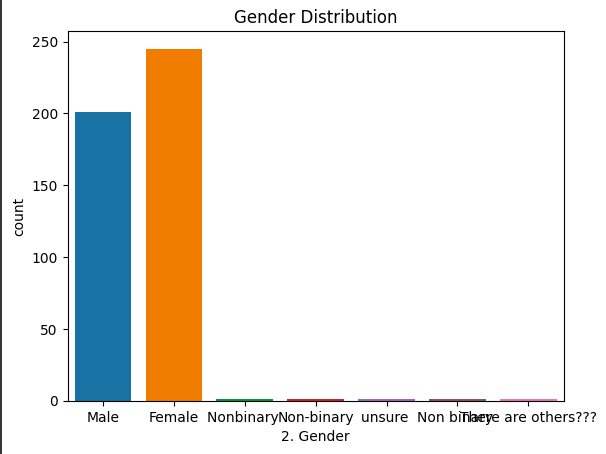

4. Effect on Sleep Patterns: We discovered a significant inverse relationship between excessive social media use and poor sleep quality. Individuals who reported difficulty sleeping had a tendency to use social media considerably more frequently. Encouragement of digital detoxification and good sleeping habits can help to lessen this issue.


5. Trends connected to Age: Participants who were younger scored higher on social media addiction. Designing instructional initiatives to encourage better internet habits, particularly among teens, requires an understanding of generational disparities.
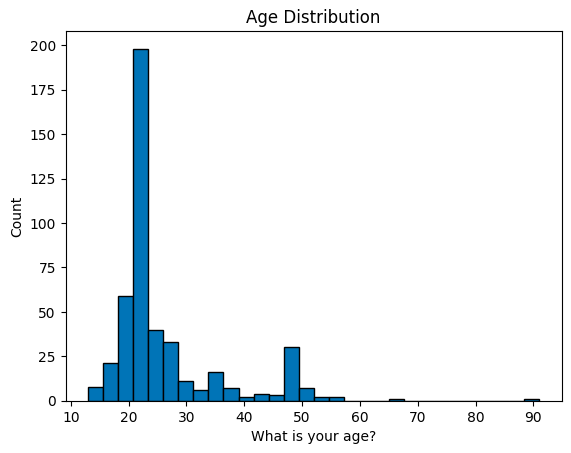

6. Cluster Analysis: Using data on social media behavior and well-being scores, we conducted a cluster analysis that revealed specific user segments. The individual needs of each cluster can be catered to through personalized treatments informed by this segmentation.
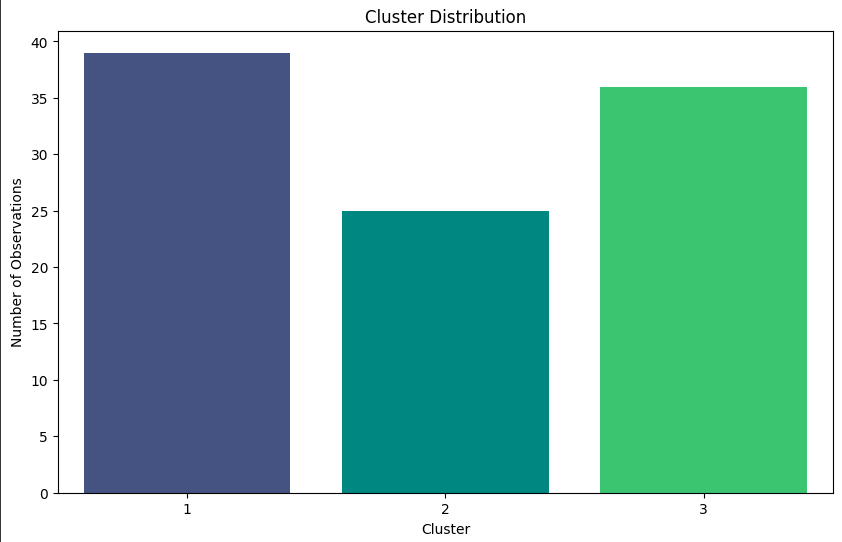

7. Data Security and Ethical Issues: Throughout the investigation, we followed stringent data security procedures. The privacy of all participants was guaranteed by the anonymization and confidential handling of all data. Participant consent was sought for data collection and analysis, with ethical considerations taking precedence.

8. Future Research: This work lays the groundwork for other research projects. Analyzing new platforms and investigating the effects of social media initiatives can yield insightful information on how digital behaviors are changing.

9. Conclusion: In summary, our investigation clarifies the complex connection between social media use and wellbeing. Through comprehension of these dynamics, we might formulate focused tactics to promote a more salubrious virtual milieu. We are sure that the information in this report will help direct our future efforts and make a beneficial contribution.

### Recommendations

Personalized Engagement:

Modify content distribution according to user groups found by clustering. Customization increases consumer pleasure and creates a feeling of community.

Mindful Social Media Usage Features:

To reduce restlessness and distractions, implement features that promote mindful social media usage, such as tools that improve focus and usage reminders.

Positive Interaction Prompts:

Use prompts to promote pleasant interactions, which will strengthen the community-focused and compassionate environment of the platform.

Digital Well-Being Resources:

ntroduce resources that address digital well-being, like articles, professional guidance, and community support, to help users manage the stress and validation-seeking behavior associated with comparisons.

Periodic Digital Detox Initiatives:

Plan events for challenges or campaigns that encourage better usage practices and increase public awareness of the significance of maintaining balance in online activity.

User Interface Optimization:

Reduce distractions by optimizing user interfaces. Simplify interfaces and apply goal-oriented designs to improve user focus when interacting with the platform.



Community Building:

Promote community-building initiatives by assisting users in sharing positive experiences and offering assistance to one another. Good communities provide a sense of community and increase user engagement.



Community Building:

Facilitate community-building initiatives, encouraging users to share positive experiences and support one another. Positive communities enhance user engagement and foster a sense of belonging.

Educational Content:

Create instructional materials that discuss how social media affects sleep, focus, and mental health. Healthier usage patterns are more likely to be adopted by informed users.

Collaboration with Mental Health Experts:

Work together with mental health specialists to give resources and expert insights directly on the platform, giving users reliable advice on how to manage their well-being.



Continuous User Feedback:

Provide avenues for ongoing customer input. Pay close attention to the issues and recommendations raised by users, and modify your approach to suit their changing requirements.

By implementing these suggestions into practice, we can build a supportive online community that puts an emphasis on user wellbeing, encourages constructive interactions, and guarantees that every user has a great and rewarding experience on social media.

Sincerely,

Group 16

Akshobya Salekoppalu Hari Charan

Sangeetha Arun Raj

Sathyanarayana Balla

Originality

No other similar published works for linear regression found with same dataset.